In [1]:
!pip install pandas matplotlib scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
# Load the datasets with proper delimiter and formatting
bank = pd.read_csv(r"C:\Users\mutya\OneDrive\Desktop\datascince\bank.csv", delimiter=";")
bank_full = pd.read_csv(r"C:\Users\mutya\OneDrive\Desktop\datascince\bank-full.csv", delimiter=";")

# Merge datasets
combined_data = pd.concat([bank, bank_full], ignore_index=True)

# Save the merged dataset
combined_data.to_csv("bank_combined.csv", index=False)
print("Datasets merged successfully into 'bank_combined.csv'.")

Datasets merged successfully into 'bank_combined.csv'.


In [4]:

# Preprocess data
# Check the structure to ensure target column is 'y'
print("Columns in combined dataset:", combined_data.columns)

Columns in combined dataset: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [5]:
# Convert categorical columns to dummy variables
data = pd.get_dummies(combined_data, drop_first=True)

# Define features (X) and target (y)
X = data.drop("y_yes", axis=1)  # Drop the target column from features
y = data["y_yes"]  # Target column

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
model = DecisionTreeClassifier(criterion="gini", max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 89.95%

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      8774
        True       0.64      0.34      0.44      1173

    accuracy                           0.90      9947
   macro avg       0.78      0.66      0.69      9947
weighted avg       0.88      0.90      0.89      9947



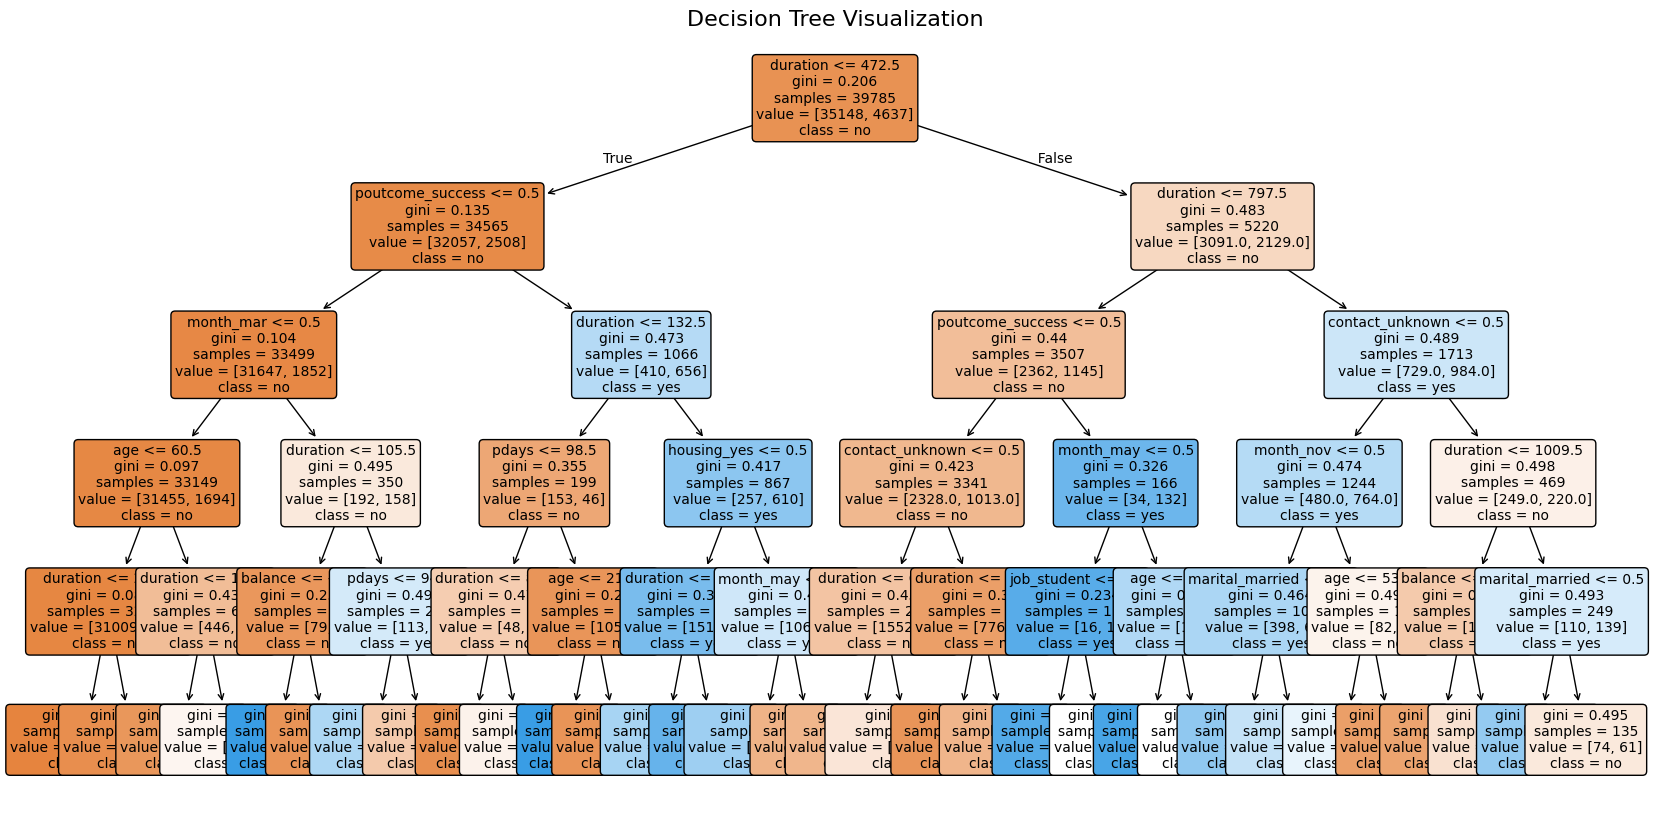

In [7]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["no", "yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()